In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt
import math

In [2]:
def plot_feature_importances_adult(model):
    n_features = X.shape[1]
    plt.figure()
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

In [3]:
#轉換資料
def convert():
    read_file = pd.read_csv (r'adult.test.txt')
    read_file.to_csv (r'adult.test.csv', index=None)
convert()

In [4]:
#匯入資料
data = pd.read_csv("adult.csv")
test_data = pd.read_csv("adult.test.csv")

In [5]:
#Training data Preprocessing
data = data.drop(["education"], axis=1) #education、educational-num兩屬性意思相同，drop education屬性
data = data.drop(["capital-gain"], axis=1) 
data = data.drop(["capital-loss"], axis=1) 
data = data.drop(data[data["workclass"]=="?"].index)
data = data.drop(data[data["native-country"]=="?"].index)
data = data.drop(["income"], axis=1)

for col in data[["workclass", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]]:
    LE = LabelEncoder()
    data[col] = LE.fit_transform(data[col])


print(data)


       age  workclass  fnlwgt  educational-num  marital-status  occupation  \
0       25          3  226802                7               4           7   
1       38          3   89814                9               2           5   
2       28          1  336951               12               2          11   
3       44          3  160323               10               2           7   
5       34          3  198693                6               4           8   
...    ...        ...     ...              ...             ...         ...   
48837   27          3  257302               12               2          13   
48838   40          3  154374                9               2           7   
48839   58          3  151910                9               6           1   
48840   22          3  201490                9               4           1   
48841   52          4  287927                9               2           4   

       relationship  race  gender  hours-per-week  native-count

In [6]:
##test data preprocessing
test_data = test_data.drop(["education"], axis=1) #education、educational-num兩屬性意思相同，drop education屬性
test_data = test_data.drop(["capital-gain"], axis=1) 
test_data = test_data.drop(["capital-loss"], axis=1) 
test_data = test_data.drop(data[data["workclass"]=="?"].index)
test_data = test_data.drop(data[data["native-country"]=="?"].index)
test_data = test_data.drop(["income"], axis=1)
    
for col in data[["workclass", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]]:
    LE = LabelEncoder()   
    test_data[col] = LE.fit_transform(test_data[col])


In [7]:
#訓練資料標準化
scaler = StandardScaler()
scaler.fit(data)
scaler_feature = scaler.transform(data)
data_scaler = pd.DataFrame(data=scaler_feature, columns=['age','workclass','educational-num','marital-status','occupation',
                                                    'relationship','race','gernder','hours-per-week','native-country','income'])
print(data_scaler)

            age  workclass  educational-num  marital-status  occupation  \
0     -1.024550  -0.091407         0.350844       -1.221254    0.942837   
1     -0.041138  -0.091407        -0.945951       -0.437867   -0.390113   
2     -0.797609  -1.838889         1.393568        0.737214   -0.390113   
3      0.412744  -0.091407        -0.278479       -0.046173   -0.390113   
4     -0.343726  -0.091407         0.084750       -1.612947    0.942837   
...         ...        ...              ...             ...         ...   
45227 -0.873256  -0.091407         0.639572        0.737214   -0.390113   
45228  0.110156  -0.091407        -0.334795       -0.437867   -0.390113   
45229  1.471802  -0.091407        -0.358120       -0.437867    2.275786   
45230 -1.251491  -0.091407         0.111228       -0.437867    0.942837   
45231  1.017920   0.782333         0.929483       -0.437867   -0.390113   

       relationship      race   gernder  hours-per-week  native-country  \
0          0.007938  0.9

In [8]:
#測試資料標準化
scaler = StandardScaler()
scaler.fit(test_data)
scaler_feature = scaler.transform(test_data)
test_data_scaler = pd.DataFrame(data=scaler_feature, columns=['age','workclass','educational-num','marital-status','occupation',
                                                    'relationship','race','gernder','hours-per-week','native-country','income'])
print(test_data_scaler)

            age  workclass  educational-num  marital-status  occupation  \
0     -0.994129   0.085414         0.353474       -1.196864    0.905239   
1     -0.055417   0.085414        -0.942391       -0.417886   -0.418769   
2     -0.777503  -1.265356         1.395450        0.750582   -0.418769   
3      0.377835   0.085414        -0.275397       -0.028397   -0.418769   
4     -1.499590  -2.616126        -0.812954       -0.028397    0.905239   
...         ...        ...              ...             ...         ...   
16276  0.016791   0.085414         0.245794        1.140071   -1.742777   
16277  1.822007  -2.616126         1.248371       -0.417886    2.229247   
16278 -0.055417   0.085414         1.755221        1.140071   -0.418769   
16279  0.377835   0.085414        -0.998420        1.140071   -1.742777   
16280 -0.272043   0.760799        -0.068939        1.140071   -0.418769   

       relationship      race   gernder  hours-per-week  native-country  \
0          0.097403  0.9

In [9]:
# # #Data mining(not use max_depth)
y_train = data_scaler['hours-per-week'].values.reshape(-1,1)

x_train = data_scaler.drop(['hours-per-week'], axis=1)

y_test = test_data_scaler['hours-per-week'].values.reshape(-1,1)

x_test = test_data_scaler.drop(["hours-per-week"], axis=1)

In [10]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [11]:
#KNN
KNN_model = KNeighborsRegressor(n_neighbors=8).fit(x_train, y_train)
KNN_predict = KNN_model.predict(x_test)

print("MAE",mean_absolute_error(y_test, KNN_predict))
print("RMSE",math.sqrt(mean_squared_error(y_test, KNN_predict)))
print("MAPE",mape(y_test,KNN_predict))

MAE 0.42548956753731887
RMSE 0.6636564103558981
MAPE 0.45122131432319706


C:\Users\user\AppData\Local\Temp\ipykernel_2692\3747007462.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


MAE 0.3864844260906408
RMSE 0.6736519251648462
MAPE 0.9610412753075407


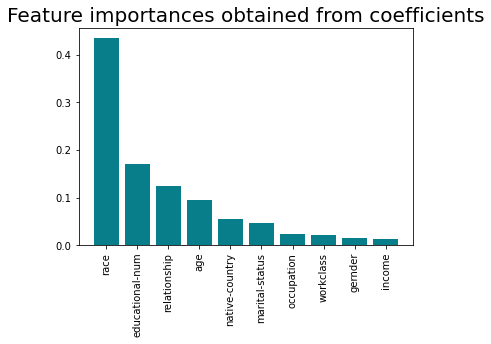

In [12]:
#RandomForest
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x_train, y_train)
rf = regressor.predict(x_test)

print("MAE",mean_absolute_error(y_test, rf))
print("RMSE",math.sqrt(mean_squared_error(y_test, rf)))
print("MAPE",mape(y_test,rf))

## important
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': regressor.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


In [13]:
#SVR 
clf = SVR(kernel='linear', C=1.25)
clf.fit(x_train, y_train)
clfp = clf.predict(x_test)

print("MAE",mean_absolute_error(y_test, clfp))
print("RMSE",math.sqrt(mean_squared_error(y_test, clfp)))
print("MAPE",mape(y_test,clfp))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE 0.556458716308098
RMSE 0.8493064994668014
MAPE 0.924361393654326


MAE 0.08592875422410866
RMSE 0.17395576875660781
MAPE 0.42131830445287255


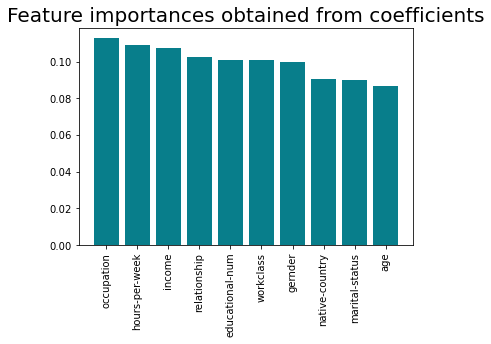

In [14]:
## 過濾類別(Race)
y_train = data_scaler.drop(['race'], axis=1)

x_train = data_scaler.drop(['race'], axis=1)

y_test = test_data_scaler.drop(["race"], axis=1)

x_test = test_data_scaler.drop(["race"], axis=1)


#RandomForest
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x_train, y_train)
rf = regressor.predict(x_test)

print("MAE",mean_absolute_error(y_test, rf))
print("RMSE",math.sqrt(mean_squared_error(y_test, rf)))
print("MAPE",mape(y_test,rf))

## important
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': regressor.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()